In [1]:
# draw boxplot for kappa, lambda specific models
import pickle
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import transformers

/Users/josefng/miniconda3/envs/antiberta/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
with open('immunomatch-kappa_kfold_pred_results.pkl', 'rb') as f:
    k_only_result = pickle.load(f)
    
with open('immunomatch-lambda_kfold_pred_results.pkl', 'rb') as f:
    l_only_result = pickle.load(f)

with open('immunomatch-mixed_kfold_pred_results.pkl', 'rb') as f:
    kl_result = pickle.load(f)

In [3]:
print(len(k_only_result), len(l_only_result))

5 5


In [4]:
k_only_result[1].metrics['test_accuracy']

0.81475136586721

In [5]:
accuracy = []
for i, fold in enumerate(k_only_result):
    accuracy += [{'Ltype': 'kappa', 'fold': i, 'accuracy': k_only_result[fold].metrics['test_accuracy']}]
for i, fold in enumerate(l_only_result):
    accuracy += [{'Ltype': 'lambda', 'fold': i, 'accuracy': l_only_result[fold].metrics['test_accuracy']}]
for i, fold in enumerate(kl_result):
    accuracy += [{'Ltype': 'mixed', 'fold': i, 'accuracy': kl_result[fold].metrics['test_accuracy']}]

accuracy = pd.DataFrame(accuracy)
accuracy

,Ltype,fold,accuracy
0,kappa,0,0.814751
1,kappa,1,0.816048
2,kappa,2,0.815631
3,kappa,3,0.816835
4,kappa,4,0.815492
5,lambda,0,0.760719
6,lambda,1,0.760070
7,lambda,2,0.760811
8,lambda,3,0.760857
9,lambda,4,0.761783


In [6]:
plt.rcParams.update({
                'font.family' : 'sans-serif',
                'font.sans-serif' : 'Arial',
                'font.style' : 'normal'
                })

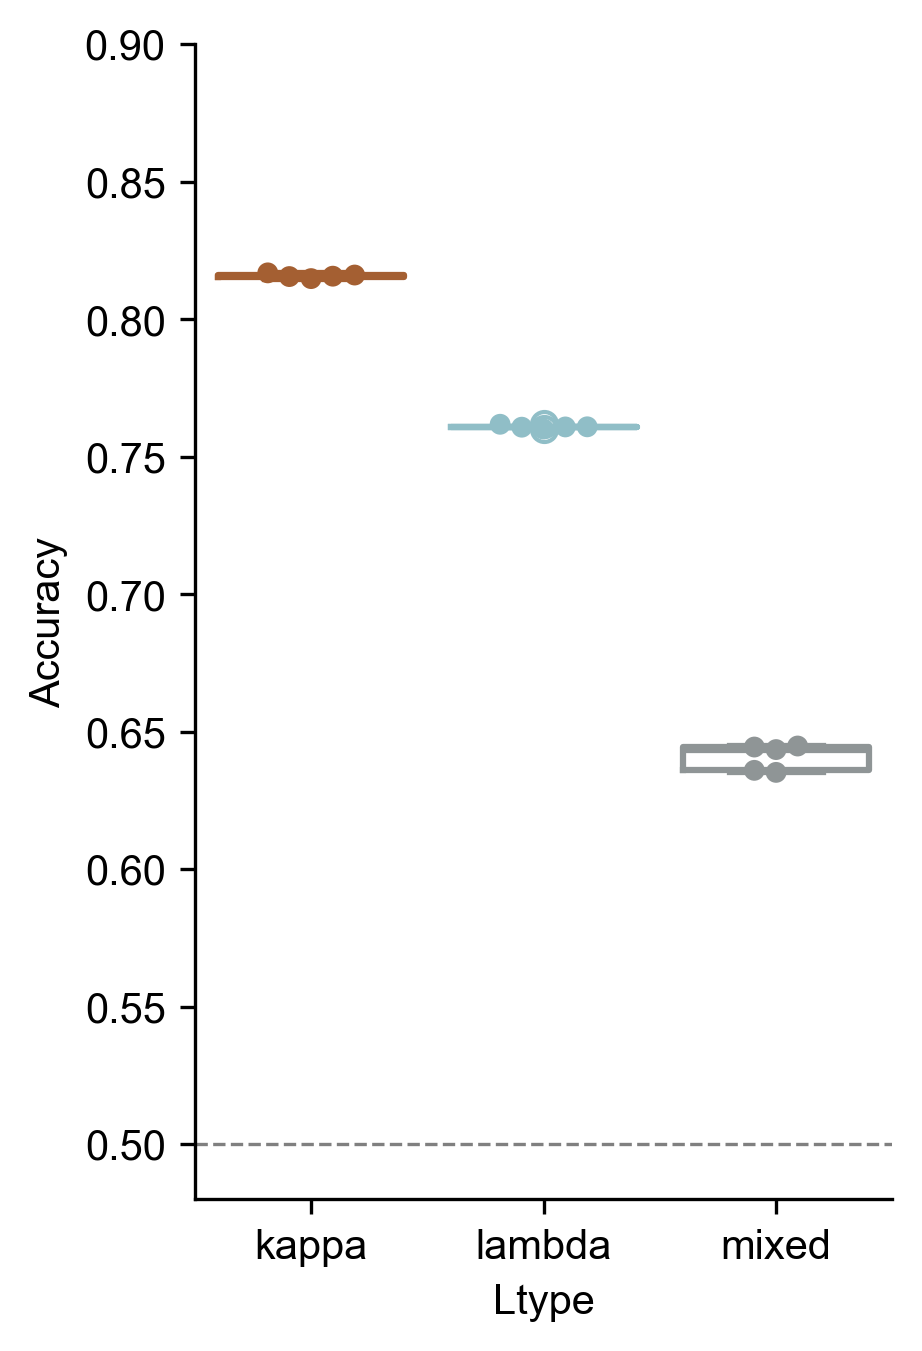

In [7]:
# plot results
fig, ax = plt.subplots(figsize=(3, 5), dpi=300)
ax.set_ylim(0.48, 0.9)
plt.axhline(y = 0.5, linestyle='dashed', color = 'grey', linewidth = 0.8)
ax.set_ylabel('Accuracy')
ax.set_xlabel('')
sns.boxplot(data=accuracy, x="Ltype", y="accuracy", hue='Ltype', fill=False, palette=['#a45f32', '#90BEC7', '#8F9596'])
sns.swarmplot(data=accuracy, x="Ltype", y="accuracy", hue='Ltype', palette=['#a45f32', '#90BEC7', '#8F9596'], ax=ax)
sns.despine()

These were standard model evaluation using with-held test set of the same type of light chains.
We should plot the accuracy results for the cross-testing strategy Dongjun used.
Following `evaluate_LType_performance.ipynb` from Dongjun's robusta files.

## Cross-test on different light chain types

### kappa

In [8]:
k_scored = pd.read_csv("immunomatch_ltype/ltype_specific_test_k-only_eval_allfolds_melted.csv")
l_scored = pd.read_csv("immunomatch_ltype/ltype_specific_test_l-only_eval_allfolds_melted.csv")
k_scored

,old_H_ab_id,old_L_ab_id,CDRH3,CDRL3,Hseq,Lseq,label,model_type,fold,pairing_score
0,jaffe_naive--TAAGTGCCACTAGTAC-1_1287152_1_Pair...,jaffe_naive--TAAGTGCCACTAGTAC-1_1287152_1_Pair...,AHRRKGYYDFWSGYGPNYYYMDV,MQALQTPGA,QITLKESGPTLVKPTQTLTLTCTFSGFSLSTSGVGVGWIRQPPGKA...,DIVMTQSPLSLPVTPGEPASISCRSSQSLLHSNGYNYLDWYLQKPG...,1,k_only,1,0.685320
1,jaffe_naive--AAACGGGCATTACCTT-1_1287145_1_Pair...,jaffe_naive--AAACGGGCATTACCTT-1_1287145_1_Pair...,ARDKDGIVGAHFDY,QQRSNWPPALT,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYYMHWVRQAPGQGLE...,EIVLTQSPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...,1,k_only,1,0.600926
2,dekosky_d1_agexp--485-486_split27_312,dekosky_d1_agexp--485-486_split27_312,ARVKMGKGNCNDTNCSWDVYYGMDV,QQRSNWPRIT,QVQLVQSGAEVKKPGSSVKVSCRASGGAFSSYSFSWVRQAPGQGLE...,PATLSLSPGERATLSCRASQSVRTFLAWYQQKPGQAPRLLIYDASN...,1,k_only,1,0.917867
3,jaffe_naive--TGTCCCAAGCACCGTC-1_1287144_1_Pair...,jaffe_naive--TGTCCCAAGCACCGTC-1_1287144_1_Pair...,ARGVGYCSGGSCYSSGEYYYYYMDV,QQSYSTPRT,QVQLQQWGAGLLKPSETLSLTCAVYGGSFSGYYWSWIRQPPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...,1,k_only,1,0.710371
4,jaffe_mem--ACGGAGACAGCGAACA-1_1279067_1_Paired...,jaffe_mem--ACGGAGACAGCGAACA-1_1279067_1_Paired...,ARHIIDTYGSGSYSNPRFGSFDS,QQYYSSPLT,EVQLLQSGGDLVQPGGSLRLSCATSGFTFTSYAITWVRQAPGKGLE...,DIVMTQSPDSLAVSLGERATINCKSSQSVLFRSNSKNYLAWYQQKP...,1,k_only,1,0.439484
...,...,...,...,...,...,...,...,...,...,...
323965,jaffe_naive--CCATTCGCAGGGCATA-1_1279073_1_Pair...,jaffe_naive--AGCTCCTGTACCGTTA-1_1287144_1_Pair...,AKDSNWNYEGYWFDP,MQALQTPLT,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,DIVMTQSPLSLPVTPGEPASISCRSSQSLLHSNGYNYLDWYLQKPG...,0,kl_mixed,5,0.407154
323966,jaffe_naive--CGCGGTATCAACGAAA-1_1287155_1_Pair...,jaffe_mem--GCGCAACCATAACCTG-1_1279074_1_Paired...,TRDQGSVVVAATLDY,HQHYSSPVT,EVQLVESGGGLVQPGRSLRLSCTASGFTFGDYAMSWFRQAPGKGLE...,DIVMTQSPDSLAVSLGERATINCKSSQSVLYSSNNKNYLAWYQKKP...,0,kl_mixed,5,0.467057
323967,jaffe_naive--CTGATAGGTTGGTGGA-1_1287145_1_Pair...,jaffe_naive--ACGTCAACAGCGAACA-1_1287146_1_Pair...,ARDPSVAYYD,QQSYSTPPT,EVQLVESGGGLVQPGGSLRLSCAASGFTFSSYWMHWVRQAPGKGLV...,DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...,0,kl_mixed,5,0.520845
323968,jaffe_naive--ACCTTTAAGGCTATCT-1_1287145_1_Pair...,jaffe_naive--AACACGTGTAAGAGAG-1_1279073_1_Pair...,AKALKSMTTVTSPFDY,QQSYSTPLFT,EVQLLESGGGLVQPGGSLRLSCAASGFTFSSYAMSWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...,0,kl_mixed,5,0.524683


In [9]:
from sklearn.metrics import accuracy_score

In [10]:
k_scored['pred_labels'] = k_scored['pairing_score'].apply(lambda x: 1 if x >= 0.5 else 0)
l_scored['pred_labels'] = l_scored['pairing_score'].apply(lambda x: 1 if x >= 0.5 else 0)

In [11]:
accuracy_df = []

for i,(model,group_m) in enumerate(k_scored.groupby(["model_type"])):
    for j,(fold,group_l) in enumerate(group_m.groupby(["fold"])):
        accuracy=accuracy_score(group_l["label"],group_l["pred_labels"])
        accuracy_df += [{'model': model[0], 'Ltype': 'kappa', 'fold': fold[0], 'accuracy': accuracy}]

for i,(model,group_m) in enumerate(l_scored.groupby(["model_type"])):
    for j,(fold,group_l) in enumerate(group_m.groupby(["fold"])):
        accuracy=accuracy_score(group_l["label"],group_l["pred_labels"])
        accuracy_df += [{'model': model[0], 'Ltype': 'lambda', 'fold': fold[0], 'accuracy': accuracy}]

accuracy_df = pd.DataFrame(accuracy_df)
accuracy_df

,model,Ltype,fold,accuracy
0,k_only,kappa,1,0.816187
1,k_only,kappa,2,0.816094
2,k_only,kappa,3,0.815631
3,k_only,kappa,4,0.816835
4,k_only,kappa,5,0.815446
5,kl_mixed,kappa,1,0.669831
6,kl_mixed,kappa,2,0.665849
7,kl_mixed,kappa,3,0.664321
8,kl_mixed,kappa,4,0.663210
9,kl_mixed,kappa,5,0.656635


In [12]:
accuracy_df['model_ltype'] = accuracy_df[['model', 'Ltype']].apply(lambda x: '_'.join(x), axis=1)

In [13]:
accuracy_df

,model,Ltype,fold,accuracy,model_ltype
0,k_only,kappa,1,0.816187,k_only_kappa
1,k_only,kappa,2,0.816094,k_only_kappa
2,k_only,kappa,3,0.815631,k_only_kappa
3,k_only,kappa,4,0.816835,k_only_kappa
4,k_only,kappa,5,0.815446,k_only_kappa
5,kl_mixed,kappa,1,0.669831,kl_mixed_kappa
6,kl_mixed,kappa,2,0.665849,kl_mixed_kappa
7,kl_mixed,kappa,3,0.664321,kl_mixed_kappa
8,kl_mixed,kappa,4,0.663210,kl_mixed_kappa
9,kl_mixed,kappa,5,0.656635,kl_mixed_kappa


/Users/josefng/miniconda3/envs/antiberta/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/josefng/miniconda3/envs/antiberta/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


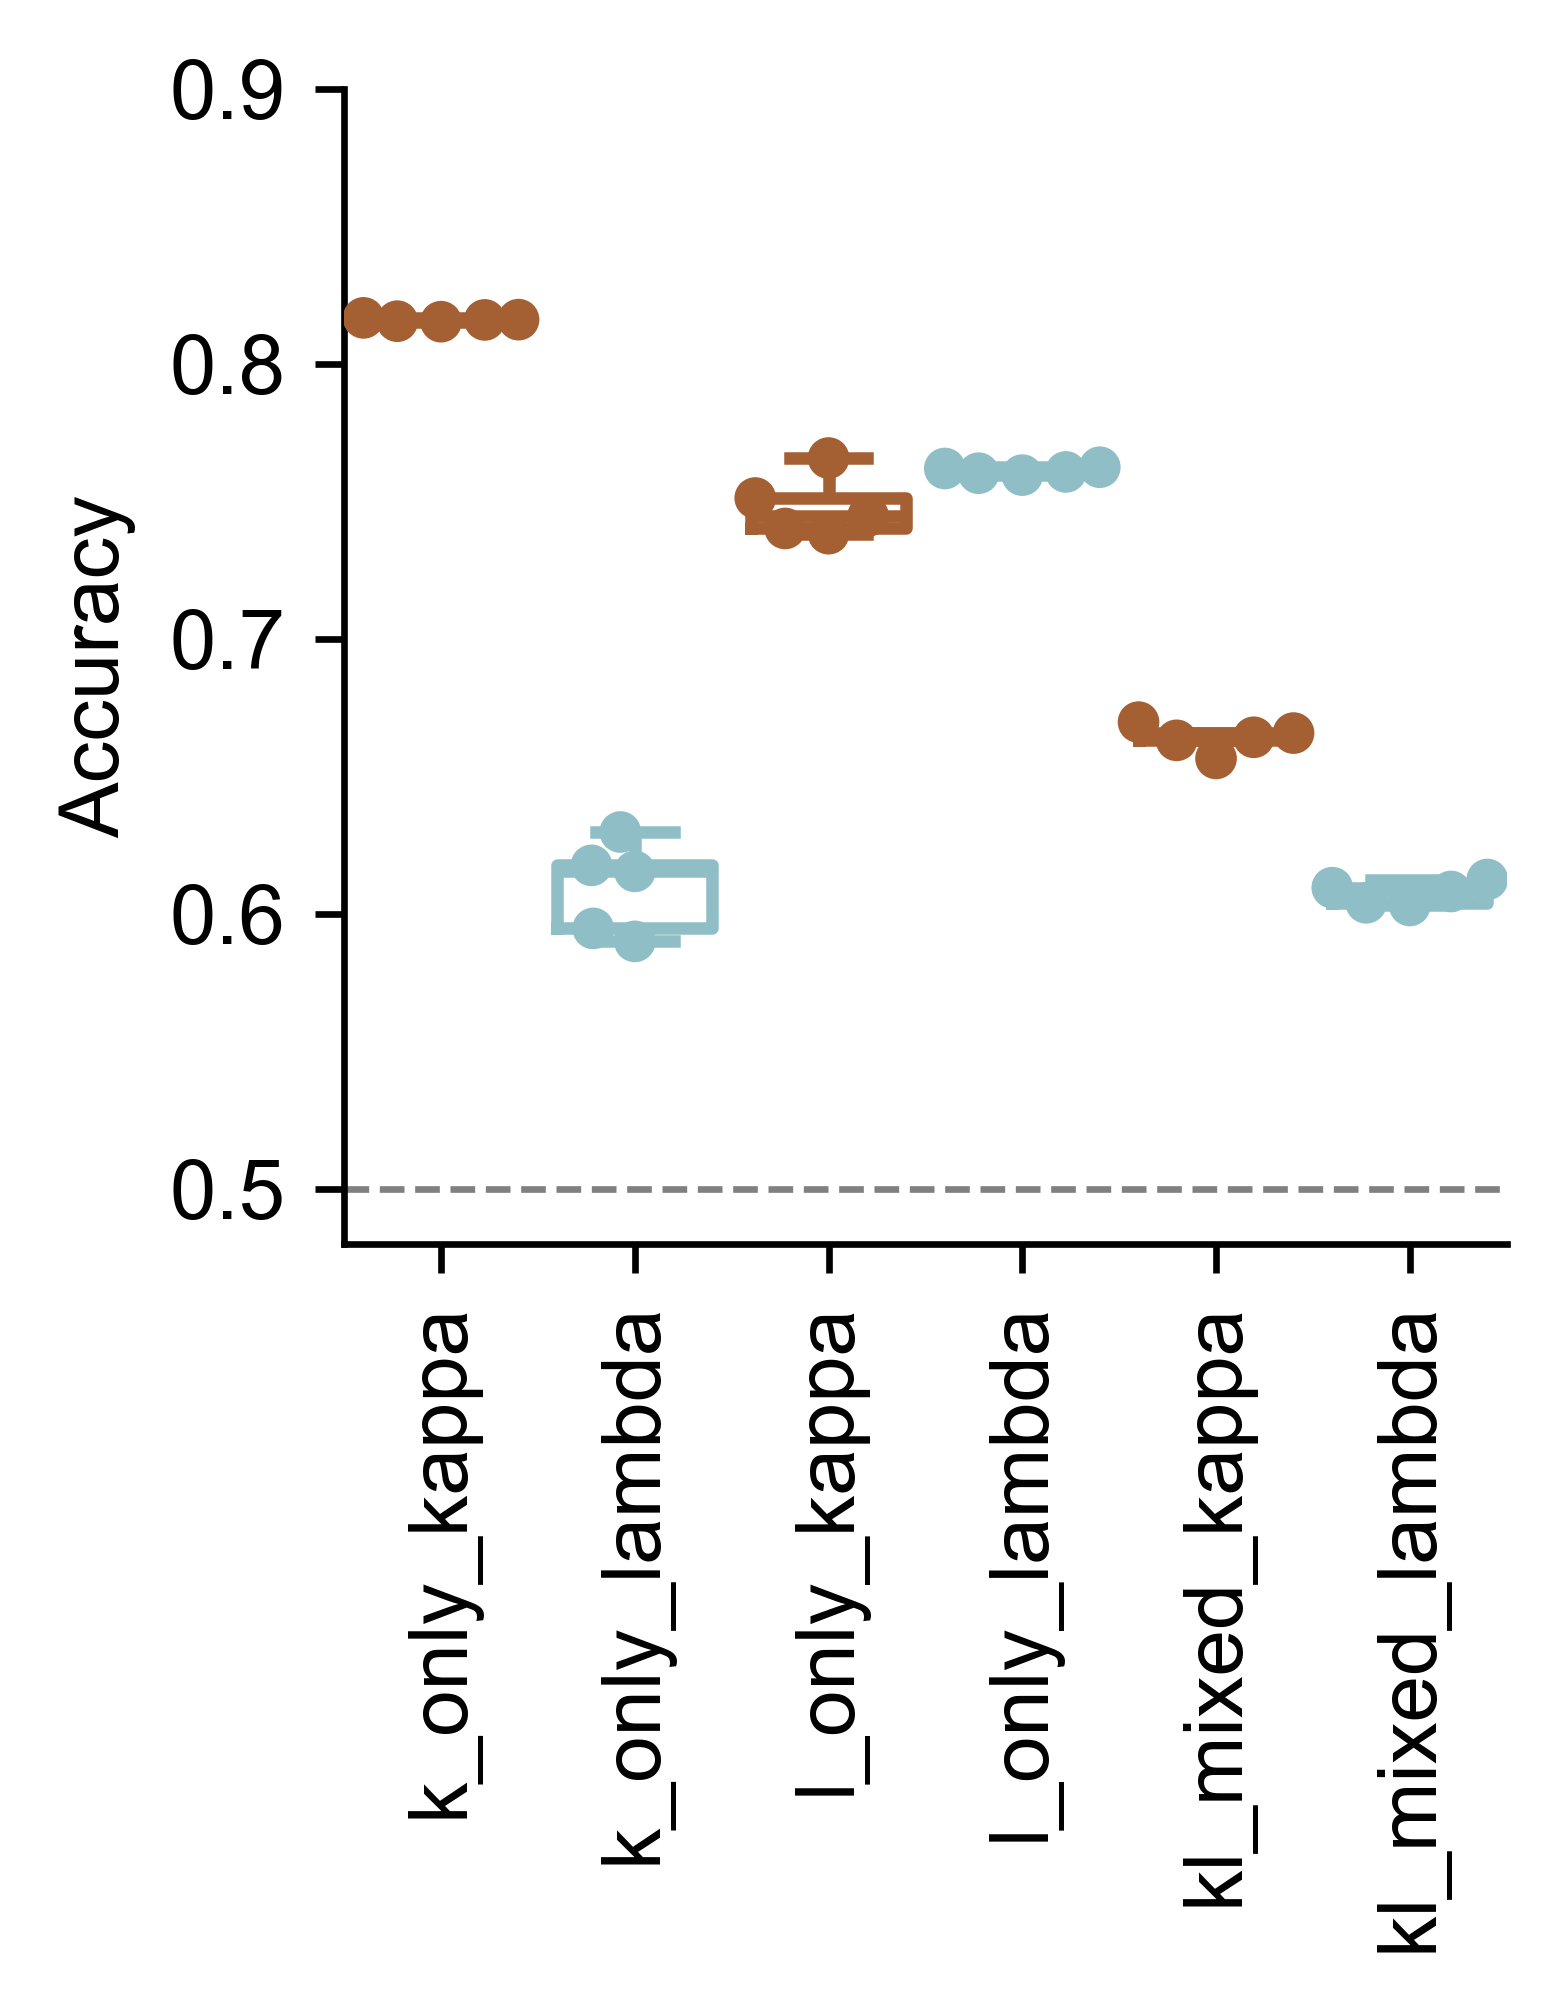

In [15]:
# plot results
axis_order = ['k_only_kappa', 'k_only_lambda', 'l_only_kappa', 'l_only_lambda', 'kl_mixed_kappa', 'kl_mixed_lambda']
fig, ax = plt.subplots(figsize=(2.5, 2.5), dpi=600)
ax.set_ylim(0.48, 0.9)
ax.tick_params(axis='x', labelrotation=90)
plt.axhline(y = 0.5, linestyle='dashed', color = 'grey', linewidth = 0.8)
sns.boxplot(data=accuracy_df, x="model_ltype", y="accuracy", hue='Ltype', fill=False, palette=['#a45f32', '#90BEC7'], 
            fliersize = 0, order = axis_order)
sns.swarmplot(data=accuracy_df, x="model_ltype", y="accuracy", hue='Ltype', palette=['#a45f32', '#90BEC7'], ax=ax)
sns.despine()
ax.set_ylabel('Accuracy')
ax.set_xlabel('')
ax.get_legend().remove()
plt.savefig("immunomatch_ltype_crosstest_accuracy.svg")